In [2]:
#Loading the libraries

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set(color_codes=True)

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [5]:
#Defining the Foursquare information

CLIENT_ID = '4OYPLKFLKFOECRZHQ3B31E3DSW2D4IPLFBRBIYDTOVI0ECJB' # your Foursquare ID
CLIENT_SECRET = 'UHTOFOUFE44Y310S45KLH5KKZT5QTVMZZNVPYWJVZADIF2FX' # your Foursquare Secret
VERSION = '20200410'
LIMIT = 30

In [6]:
# We find the coordinates of the city centre (Piccadilly Circus) of London - that's where we want to open our restaurant

address = 'Piccadilly Circus, London, UK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5097922 -0.13442883634595293


In [7]:
# We search for all the restaurant in the proximity of 1km from the centre of London

search_query = 'Coffee'
radius = 1000

In [8]:
#Defining the url

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [9]:
#Checking the results

results = requests.get(url).json()
venues = results['response']['venues']

In [10]:
dataframe = json_normalize(venues)

#Checking the dimensions

dataframe.shape

(30, 19)

In [11]:
#We apply the same analysis as in one of the ungraded notebooks

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Ralph's Coffee & Bar,Café,173 Regent St,GB,London,United Kingdom,NaN,465,"[173 Regent St, London, Greater London, W1B 4J...","[{'label': 'display', 'lat': 51.51219425144683...",51.512194,-0.139929,NaN,W1B 4JQ,Greater London,5883913551d19e062a758a77
1,Costa Coffee,Coffee Shop,200 Piccadilly,GB,London,United Kingdom,NaN,175,"[200 Piccadilly, London, Greater London, W1J 9...","[{'label': 'display', 'lat': 51.50896578159291...",51.508966,-0.136586,NaN,W1J 9HU,Greater London,4b2630f7f964a5200a7924e3
2,Monmouth Coffee Company,Coffee Shop,27 Monmouth St,GB,Covent Garden,United Kingdom,NaN,728,"[27 Monmouth St, Covent Garden, Greater London...","[{'label': 'display', 'lat': 51.514314, 'lng':...",51.514314,-0.126824,Holborn and Covent Garden,WC2H 9EU,Greater London,4ac518edf964a520c1ac20e3
3,Costa Coffee,Coffee Shop,15 Regent St,GB,London,United Kingdom,Jermyn St,117,"[15 Regent St (Jermyn St), London, Greater Lon...","[{'label': 'display', 'lat': 51.50879033505443...",51.508790,-0.133887,NaN,SW1Y 4LR,Greater London,4cda944022bd721e533df047
4,Department of Coffee and Social Affairs,Coffee Shop,15 Sherwood St,GB,Soho,United Kingdom,Regent St Quadrant,157,"[15 Sherwood St (Regent St Quadrant), Soho, Gr...","[{'label': 'display', 'lat': 51.51087965006803...",51.510880,-0.135874,"Piccadilly, London, Greater London",W1F 7ED,Greater London,551a93a2498ed90a2cc7e544
5,Algerian Coffee Stores,Coffee Shop,52 Old Compton St,GB,London,United Kingdom,NaN,378,"[52 Old Compton St, London, Greater London, W1...","[{'label': 'display', 'lat': 51.51286473760223...",51.512865,-0.132084,NaN,W1D 4PB,Greater London,4aeebda6f964a52038d421e3
6,The Old Coffee House,Pub,49 Beak St,GB,Soho,United Kingdom,NaN,374,"[49 Beak St, Soho, Greater London, W1F 9SF, Un...","[{'label': 'display', 'lat': 51.51262085770566...",51.512621,-0.137345,NaN,W1F 9SF,Greater London,4ad204d6f964a520dfde20e3
7,Crosstown Doughnuts & Coffee,Donut Shop,4 Broadwick St,GB,London,United Kingdom,NaN,473,"[4 Broadwick St, London, Greater London, W1F 8...","[{'label': 'display', 'lat': 51.51404256630057...",51.514043,-0.134604,"Soho, London, Greater London",W1F 8HJ,Greater London,553e368d498ecddb31302a1c
8,Costa Coffee,Coffee Shop,11 Argyll St,GB,London,United Kingdom,NaN,711,"[11 Argyll St, London, Greater London, W1F 7TX...","[{'label': 'display', 'lat': 51.51475276642239...",51.514753,-0.140906,NaN,W1F 7TX,Greater London,4b25316df964a520b96d24e3
9,Costa Coffee,Coffee Shop,4 Great Portland St,GB,London,United Kingdom,NaN,790,"[4 Great Portland St, London, Greater London, ...","[{'label': 'display', 'lat': 51.51573111967288...",51.515731,-0.140687,NaN,W1W 8QJ,Greater London,4c3d6ed94bc9a5939b07d471


In [12]:
# Since we are only interested in the Cafes, we restrict the category to Cafe
#We see on the map that there is both "Coffee Shop" and "Café" in the categories so we keep restrict
#our dataset to them

df = dataframe_filtered
df1 = df[df['categories'] == 'Café']
df2 = df[df['categories'] == 'Coffee Shop']
df = df1.append(df2)
df

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Ralph's Coffee & Bar,Café,173 Regent St,GB,London,United Kingdom,NaN,465,"[173 Regent St, London, Greater London, W1B 4J...","[{'label': 'display', 'lat': 51.51219425144683...",51.512194,-0.139929,NaN,W1B 4JQ,Greater London,5883913551d19e062a758a77
12,Soho Coffee Club,Café,Dean St,GB,Soho,United Kingdom,NaN,612,"[Dean St, Soho, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.51527327636101...",51.515273,-0.133681,NaN,NaN,Greater London,4cc2c86b8062468853762b2f
29,Hide Away Coffee,Café,7 Smith's Ct,GB,London,United Kingdom,Lexington St,189,"[7 Smith's Ct (Lexington St), London, Greater ...","[{'label': 'display', 'lat': 51.511401, 'lng':...",51.511401,-0.135320,NaN,W1F 9UJ,Greater London,5bb75697531593002cc1688d
1,Costa Coffee,Coffee Shop,200 Piccadilly,GB,London,United Kingdom,NaN,175,"[200 Piccadilly, London, Greater London, W1J 9...","[{'label': 'display', 'lat': 51.50896578159291...",51.508966,-0.136586,NaN,W1J 9HU,Greater London,4b2630f7f964a5200a7924e3
2,Monmouth Coffee Company,Coffee Shop,27 Monmouth St,GB,Covent Garden,United Kingdom,NaN,728,"[27 Monmouth St, Covent Garden, Greater London...","[{'label': 'display', 'lat': 51.514314, 'lng':...",51.514314,-0.126824,Holborn and Covent Garden,WC2H 9EU,Greater London,4ac518edf964a520c1ac20e3
3,Costa Coffee,Coffee Shop,15 Regent St,GB,London,United Kingdom,Jermyn St,117,"[15 Regent St (Jermyn St), London, Greater Lon...","[{'label': 'display', 'lat': 51.50879033505443...",51.508790,-0.133887,NaN,SW1Y 4LR,Greater London,4cda944022bd721e533df047
4,Department of Coffee and Social Affairs,Coffee Shop,15 Sherwood St,GB,Soho,United Kingdom,Regent St Quadrant,157,"[15 Sherwood St (Regent St Quadrant), Soho, Gr...","[{'label': 'display', 'lat': 51.51087965006803...",51.510880,-0.135874,"Piccadilly, London, Greater London",W1F 7ED,Greater London,551a93a2498ed90a2cc7e544
5,Algerian Coffee Stores,Coffee Shop,52 Old Compton St,GB,London,United Kingdom,NaN,378,"[52 Old Compton St, London, Greater London, W1...","[{'label': 'display', 'lat': 51.51286473760223...",51.512865,-0.132084,NaN,W1D 4PB,Greater London,4aeebda6f964a52038d421e3
8,Costa Coffee,Coffee Shop,11 Argyll St,GB,London,United Kingdom,NaN,711,"[11 Argyll St, London, Greater London, W1F 7TX...","[{'label': 'display', 'lat': 51.51475276642239...",51.514753,-0.140906,NaN,W1F 7TX,Greater London,4b25316df964a520b96d24e3
9,Costa Coffee,Coffee Shop,4 Great Portland St,GB,London,United Kingdom,NaN,790,"[4 Great Portland St, London, Greater London, ...","[{'label': 'display', 'lat': 51.51573111967288...",51.515731,-0.140687,NaN,W1W 8QJ,Greater London,4c3d6ed94bc9a5939b07d471


In [13]:
#Let's illustrate how cafe's look like on the map of London

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the cafes as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [14]:
#Checking the dimensions

df.shape

(24, 16)

In [15]:
#Now let us add ratings and other numerical values to our analysis

ratings = []
price_tier = []
Credit_card_payments = []
Outdoor_sitting = []
Breakfest = []
verified = []

for i in df['id']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        ratings.append(result['response']['venue']['rating'])
    except:
        ratings.append('No info')
    try:
        price_tier.append(result['response']['venue']['price']['tier'])
    except:
        price_tier.append("No info")
    try:
        Credit_card_payments.append(result['response']['venue']['attributes']['groups'][1]['count'])
    except:
        Credit_card_payments.append("No info")
    try:
        Outdoor_sitting.append(result['response']['venue']['attributes']['groups'][2]['count'])
    except:
        Outdoor_sitting.append("No info")
    try:
        Breakfest.append(result['response']['venue']['attributes']['groups'][3]['count'])
    except:
        Breakfest.append("No info")
    try:
        verified.append(result['response']['venue']['verified'])
    except:
        verified.append("No info")
    #ratings.append(result['response']['venue']['rating'])

In [16]:
#Let us add the columns to our dataframe

df['ratings'] = ratings
df['price_tier'] = price_tier
df['Credit_card_payments'] = Credit_card_payments
df['Outdoor_sitting'] = Outdoor_sitting
df['Breakfest'] = Breakfest
df['verified'] = verified

In [17]:
df = df[['name','lat','lng','distance','ratings','price_tier','Credit_card_payments','Outdoor_sitting','Breakfest','verified']]
df.head()

,name,lat,lng,distance,ratings,price_tier,Credit_card_payments,Outdoor_sitting,Breakfest,verified
0,Ralph's Coffee & Bar,51.512194,-0.139929,465,9,1,5,8,5,False
12,Soho Coffee Club,51.515273,-0.133681,612,No info,1,No info,No info,No info,False
29,Hide Away Coffee,51.511401,-0.135320,189,8.6,1,8,No info,No info,False
1,Costa Coffee,51.508966,-0.136586,175,6.5,2,5,1,1,False
2,Monmouth Coffee Company,51.514314,-0.126824,728,9.2,2,5,1,3,False


In [18]:
#Since we try to predict ratings we "get rid" of the coffees which have no ratings

df = df[df.ratings != 'No info']

In [43]:
df

,name,lat,lng,distance,ratings,price_tier,Credit_card_payments,Outdoor_sitting,Breakfest,verified
0,Ralph's Coffee & Bar,51.512194,-0.139929,465,9.0,1,5,8,5,False
29,Hide Away Coffee,51.511401,-0.135320,189,8.6,1,8,1,1,False
1,Costa Coffee,51.508966,-0.136586,175,6.5,2,5,1,1,False
2,Monmouth Coffee Company,51.514314,-0.126824,728,9.2,2,5,1,3,False
3,Costa Coffee,51.508790,-0.133887,117,6.2,1,5,1,1,False
4,Department of Coffee and Social Affairs,51.510880,-0.135874,157,7.7,1,5,1,1,False
5,Algerian Coffee Stores,51.512865,-0.132084,378,8.7,1,5,1,1,False
8,Costa Coffee,51.514753,-0.140906,711,5.8,1,5,1,1,False
9,Costa Coffee,51.515731,-0.140687,790,6.0,2,5,1,1,False
10,Costa Coffee,51.511152,-0.125678,624,6.1,1,5,1,1,False


In [42]:
#Data wrangling (fillling in the missing values)

df['Credit_card_payments'][11] = df['Credit_card_payments'].value_counts().idxmax()
df['Outdoor_sitting'][11] = df['Outdoor_sitting'].value_counts().idxmax()
df['Breakfest'][11] = df['Breakfest'].value_counts().idxmax()
df['Outdoor_sitting'][23] = df['Outdoor_sitting'].value_counts().idxmax()
df['Breakfest'][23] = df['Breakfest'].value_counts().idxmax()
df['Outdoor_sitting'][29] = df['Outdoor_sitting'].value_counts().idxmax()
df['Breakfest'][29] = df['Breakfest'].value_counts().idxmax()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWar

In [40]:
df

,name,lat,lng,distance,ratings,price_tier,Credit_card_payments,Outdoor_sitting,Breakfest,verified
0,Ralph's Coffee & Bar,51.512194,-0.139929,465,9.0,1,5,8,5,False
29,Hide Away Coffee,51.511401,-0.135320,189,8.6,1,8,No info,No info,False
1,Costa Coffee,51.508966,-0.136586,175,6.5,2,5,1,1,False
2,Monmouth Coffee Company,51.514314,-0.126824,728,9.2,2,5,1,3,False
3,Costa Coffee,51.508790,-0.133887,117,6.2,1,5,1,1,False
4,Department of Coffee and Social Affairs,51.510880,-0.135874,157,7.7,1,5,1,1,False
5,Algerian Coffee Stores,51.512865,-0.132084,378,8.7,1,5,1,1,False
8,Costa Coffee,51.514753,-0.140906,711,5.8,1,5,1,1,False
9,Costa Coffee,51.515731,-0.140687,790,6.0,2,5,1,1,False
10,Costa Coffee,51.511152,-0.125678,624,6.1,1,5,1,1,False


In [44]:
#Converting objects to floats so that we can make a numerical analysis

df['ratings'] = df['ratings'].astype(str).astype(float)
df['Credit_card_payments'] = df['Credit_card_payments'].astype(str).astype(int)
df['Outdoor_sitting'] = df['Outdoor_sitting'].astype(str).astype(int)
df['Breakfest'] = df['Breakfest'].astype(str).astype(int)

In [45]:
#Checking that conversion worked

df.dtypes

name                     object
lat                     float64
lng                     float64
distance                  int64
ratings                 float64
price_tier                int64
Credit_card_payments      int64
Outdoor_sitting           int64
Breakfest                 int64
verified                   bool
dtype: object

In [46]:
df

,name,lat,lng,distance,ratings,price_tier,Credit_card_payments,Outdoor_sitting,Breakfest,verified
0,Ralph's Coffee & Bar,51.512194,-0.139929,465,9.0,1,5,8,5,False
29,Hide Away Coffee,51.511401,-0.135320,189,8.6,1,8,1,1,False
1,Costa Coffee,51.508966,-0.136586,175,6.5,2,5,1,1,False
2,Monmouth Coffee Company,51.514314,-0.126824,728,9.2,2,5,1,3,False
3,Costa Coffee,51.508790,-0.133887,117,6.2,1,5,1,1,False
4,Department of Coffee and Social Affairs,51.510880,-0.135874,157,7.7,1,5,1,1,False
5,Algerian Coffee Stores,51.512865,-0.132084,378,8.7,1,5,1,1,False
8,Costa Coffee,51.514753,-0.140906,711,5.8,1,5,1,1,False
9,Costa Coffee,51.515731,-0.140687,790,6.0,2,5,1,1,False
10,Costa Coffee,51.511152,-0.125678,624,6.1,1,5,1,1,False


In [47]:
#Converting boolean to integer

df['verified'] = df['verified'].astype(int)

In [476]:
df

,name,lat,lng,distance,ratings,price_tier,Credit_card_payments,Outdoor_sitting,Breakfest,verified
0,Ralph's Coffee & Bar,51.512194,-0.139929,465,9.0,1,5,8,5,0
29,Hide Away Coffee,51.511401,-0.135320,189,8.6,1,8,1,1,0
1,Monmouth Coffee Company,51.514314,-0.126824,728,9.2,2,5,1,3,0
2,Costa Coffee,51.508966,-0.136586,175,6.5,2,5,1,1,0
3,Costa Coffee,51.508790,-0.133887,117,6.2,1,5,1,1,0
4,Department of Coffee and Social Affairs,51.510880,-0.135874,157,7.7,1,5,1,1,0
5,Algerian Coffee Stores,51.512865,-0.132084,378,8.7,1,5,1,1,0
8,Costa Coffee,51.514753,-0.140906,711,5.8,1,5,1,1,0
9,Costa Coffee,51.515731,-0.140687,790,6.0,2,5,1,1,0
10,Costa Coffee,51.511152,-0.125678,624,6.1,1,5,1,1,0


In [49]:
#We want to see where the "good" coffee places are located on the map

df_good = df[df.ratings > 7.0]
df_good

,name,lat,lng,distance,ratings,price_tier,Credit_card_payments,Outdoor_sitting,Breakfest,verified
0,Ralph's Coffee & Bar,51.512194,-0.139929,465,9.0,1,5,8,5,0
29,Hide Away Coffee,51.511401,-0.135320,189,8.6,1,8,1,1,0
2,Monmouth Coffee Company,51.514314,-0.126824,728,9.2,2,5,1,3,0
4,Department of Coffee and Social Affairs,51.510880,-0.135874,157,7.7,1,5,1,1,0
5,Algerian Coffee Stores,51.512865,-0.132084,378,8.7,1,5,1,1,0
24,Sharps Coffee Bar,51.518809,-0.134006,1004,8.6,1,3,5,1,1


In [50]:
#Let's illustrate how those good cafes

venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add the cafes as blue circle markers
for lat, lng in zip(df_good.lat, df_good.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

# display map
venues_map2

In [51]:
##Summary of ratings
df['ratings'].describe()

count    18.000000
mean      7.016667
std       1.294445
min       4.700000
25%       6.200000
50%       6.500000
75%       8.375000
max       9.200000
Name: ratings, dtype: float64

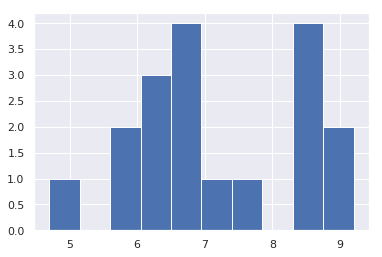

In [466]:
#plotting a histogram
df['ratings'].hist()

In [52]:
#Running a linear regression on all our characteristics

y = df['ratings']
X = df[['distance','price_tier','Credit_card_payments','Outdoor_sitting','Breakfest','verified']]
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ratings   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     2.172
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.126
Time:                        21:26:37   Log-Likelihood:                -22.639
No. Observations:                  18   AIC:                             59.28
Df Residuals:                      11   BIC:                             65.51
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8639      1.960      2.482      0.030       0.550       9.178
distance                -0.0008      0.001     -0.892      0.391      -0.003       0.001
price_tier               0.0528      0.803      0.066      0.949      -1.715       1.821
Credit_card_payments     0.2765      0.268      1.031      0.325      -0.314       0.867
Outdoor_sitting         -0.0859      0.271     -0.317      0.757      -0.683       0.511
Breakfest                0.8476      0.459      1.846      0.092      -0.163       1.858
verified                 3.2285      1.444      2.236      0.047       0.051       6.406
==============================================================================
Omnibus:                        0.943   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.112
Skew:                           0.141   Prob(JB):                        0.946
Kurtosis:                       3.262   Cond. No.                     5.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#regression on the "most crucial" aspects

y = df['ratings']
X = df[['distance','price_tier']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ratings   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.1598
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.854
Time:                        21:46:13   Log-Likelihood:                -29.482
No. Observations:                  18   AIC:                             64.96
Df Residuals:                      15   BIC:                             67.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0346      1.252      5.620      0.000       4.367       9.703
distance      -0.0005      0.001     -0.478      0.639      -0.003       0.002
price_tier     0.2386      0.864      0.276      0.786      -1.602       2.079
==============================================================================
Omnibus:                        1.337   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.001
Skew:                           0.319   Prob(JB):                        0.606
Kurtosis:                       2.037   Cond. No.                     3.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#The simplest regression model

y = df['ratings']
X = df['distance']
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ratings   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.2583
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.618
Time:                        21:46:27   Log-Likelihood:                -29.528
No. Observations:                  18   AIC:                             63.06
Df Residuals:                      16   BIC:                             64.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3218      0.677     10.821      0.000       5.887       8.756
distance      -0.0005      0.001     -0.508      0.618      -0.003       0.002
==============================================================================
Omnibus:                        1.011   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.902
Skew:                           0.351   Prob(JB):                        0.637
Kurtosis:                       2.157   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""